<h1 style="font-size:20px"><strong>Import Liberaries</h1>

In [ ]:
import os
import pathlib

# For dataframes and visualizations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
plt.style.use("fivethirtyeight")
%matplotlib inline

# Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten

print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

import warnings
warnings.filterwarnings('ignore')

Tensorflow Version: 2.6.2
Keras Version: 2.6.0


<h1 style="font-size:20px"><strong>Dataset Loading</h1>

In [3]:
data_dir_train = pathlib.Path('../input/beginner-chest-xray-image-classification/chest_xray/train')
data_dir_test = pathlib.Path('../input/beginner-chest-xray-image-classification/chest_xray/test')
data_dir_val = pathlib.Path('../input/beginner-chest-xray-image-classification/chest_xray/pred')

In [4]:
print("Number of Images in Train:", len(list(data_dir_train.glob("*/*.jpeg"))))
print("Number of Images in Test:", len(list(data_dir_test.glob("*/*.jpeg"))))
print("Number of Images in Validation:", len(list(data_dir_val.glob("*/*.jpeg"))))

Number of Images in Train: 7315
Number of Images in Test: 620
Number of Images in Validation: 9


In [5]:
height = 150
width = 150
batch_size = 16
seed = 42 

In [8]:

# "training" dataset with 0.2 as validation split.
train_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed=seed,
validation_split=0.2,
subset='training',
image_size=(height,width),
batch_size=batch_size)

Found 7315 files belonging to 2 classes.
Using 5852 files for training.


In [9]:
# "validation" dataset with 0.2 as validation split.

val_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed=seed,
validation_split=0.2,
subset='validation',
image_size=(height,width),
batch_size=batch_size)

Found 7315 files belonging to 2 classes.
Using 1463 files for validation.


In [10]:
# Store all the available class names from the dataset. (NORMAL and PNEUMONIA)
class_names = train_ds.class_names
class_names

['NORMAL', 'PNEUMONIA']

<h1 style="font-size:20px"><strong>Visualizing</strong></h1>

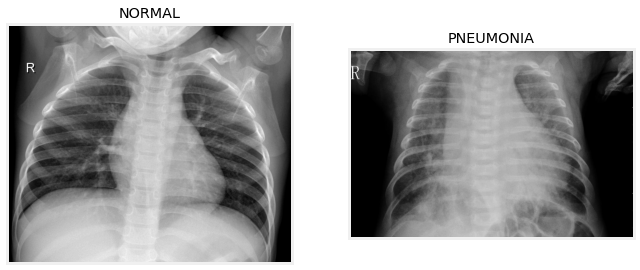

In [11]:
#Canvas size
plt.figure(figsize=[10,8])

for index, classes in enumerate(class_names):
    for images in train_ds.file_paths:
        if classes in images:
            img = image.imread(images)
            plt.subplot(1,2,index+1)
            plt.imshow(img, cmap=plt.cm.gist_gray)
            plt.xticks([])
            plt.yticks([])
            plt.title(str(classes))
            break
plt.show()

<h1 style="font-size:20px;"><strong>Building Model </strong></h1>

In [12]:

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(height, width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2)
])

In [13]:
# Compile model where we define the optimizer, loss function and the metric which will be used to evaluate.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# Train our model
history = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20


2022-03-23 14:26:45.290799: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-23 14:26:48.028974: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


366/366 [==============================] - 77s 185ms/step - loss: 0.2915 - accuracy: 0.8804 - val_loss: 0.1931 - val_accuracy: 0.9282
Epoch 2/20
366/366 [==============================] - 51s 137ms/step - loss: 0.1720 - accuracy: 0.9346 - val_loss: 0.1427 - val_accuracy: 0.9494
Epoch 3/20
366/366 [==============================] - 50s 133ms/step - loss: 0.1294 - accuracy: 0.9487 - val_loss: 0.1152 - val_accuracy: 0.9563
Epoch 4/20
366/366 [==============================] - 51s 136ms/step - loss: 0.1054 - accuracy: 0.9588 - val_loss: 0.1145 - val_accuracy: 0.9590
Epoch 5/20
366/366 [==============================] - 50s 133ms/step - loss: 0.0840 - accuracy: 0.9670 - val_loss: 0.1346 - val_accuracy: 0.9556
Epoch 6/20
366/366 [==============================] - 50s 135ms/step - loss: 0.0826 - accuracy: 0.9692 - val_loss: 0.1098 - val_accuracy: 0.9624
Epoch 7/20
366/366 [==============================] - 49s 133ms/step - loss: 0.0681 - accuracy: 0.9747 - val_loss: 0.1190 - val_accuracy: 0.9

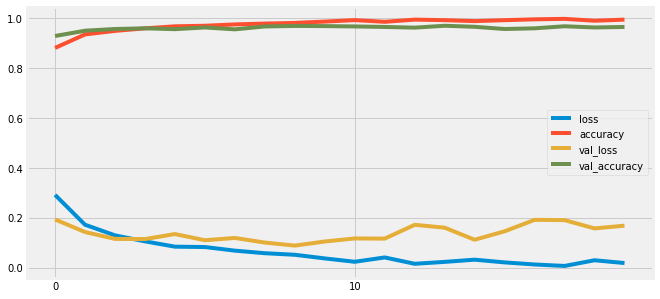

In [17]:
# Graph to check the loss and accuracy
pd.DataFrame(history.history).plot(figsize=[10,5])
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,10,2))
plt.show()

<h1 style="font-size:20px;"><strong>Evaluation</strong></h1>

In [18]:
#Test dataset for evaluation
test_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_test,
seed=seed,
image_size=(height,width),
batch_size=batch_size)

Found 620 files belonging to 2 classes.


In [19]:
model.evaluate(test_ds, batch_size=batch_size)

39/39 [==============================] - 5s 101ms/step - loss: 0.2475 - accuracy: 0.9484


[0.24750874936580658, 0.948387086391449]

<h1 style="font-size:20px"><strong>Save the model</strong></h1>

In [20]:
model.save("./xray_model.h5")

<h1 style="font-size:20px"><strong>Prediction</strong></h1>

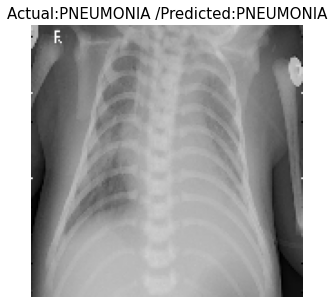

In [21]:
# Loading the model
my_xray_cnnmodel = keras.models.load_model("./xray_model.h5")

image_path = '../input/beginner-chest-xray-image-classification/chest_xray/pred/PNEUMONIA/PNEUMONIA_1.jpeg'

# Preprocessing the image
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(150,150,3))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = my_xray_cnnmodel.predict(input_arr)

classes = ['NORMAL', 'PNEUMONIA']

actual = ''

for class_name in classes:
    if class_name in image_path:
        actual = class_name

pred = classes[np.argmax(predictions, axis=1)[0]]

plt.figure(figsize=[8,5])
plt.imshow(image, cmap='gray')
plt.title("Actual:"+actual+" /Predicted:"+pred, size=15)
plt.axis('off')
plt.show()